In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import os 

In [4]:
filepath = 'cps_85_wages.csv'
if not os.path.exists(filepath):
    print('File not found')
else:
    df= pd.read_csv(filepath, index_col= 0)
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 8 to 16
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SOUTH       534 non-null    object 
 1   SEX         534 non-null    object 
 2   EXPERIENCE  534 non-null    int64  
 3   UNION       534 non-null    object 
 4   WAGE        534 non-null    float64
 5   AGE         534 non-null    int64  
 6   RACE        534 non-null    object 
 7   OCCUPATION  534 non-null    object 
 8   SECTOR      534 non-null    object 
 9   MARR        534 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 45.9+ KB
None


In [5]:
df.describe()

,EXPERIENCE,WAGE,AGE
count,534.000000,534.000000,534.000000
mean,17.822097,9.024064,36.833333
std,12.379710,5.139097,11.726573
min,0.000000,1.000000,18.000000
25%,8.000000,5.250000,28.000000
50%,15.000000,7.780000,35.000000
75%,26.000000,11.250000,44.000000
max,55.000000,44.500000,64.000000


In [6]:
df.head()

,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
EDUCATION,,,,,,,,,,
8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
12,no,male,17,not_member,7.50,35,White,Other,Other,Married


<AxesSubplot: ylabel='Frequency'>

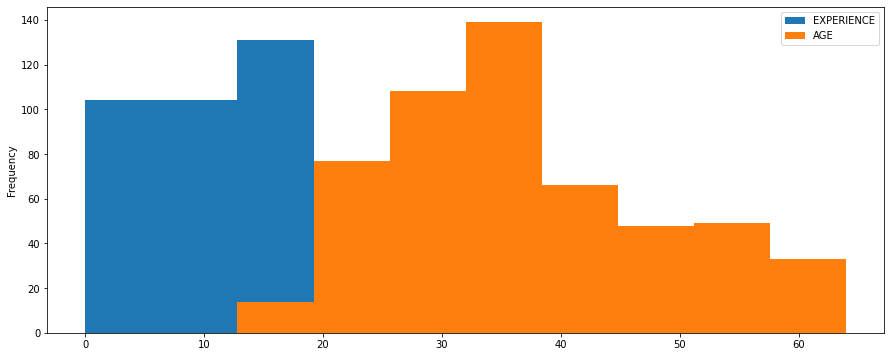

In [7]:
df[['EXPERIENCE', 'AGE']].plot(figsize= (15,6), kind = 'hist'  )

<AxesSubplot: xlabel='EXPERIENCE', ylabel='WAGE'>

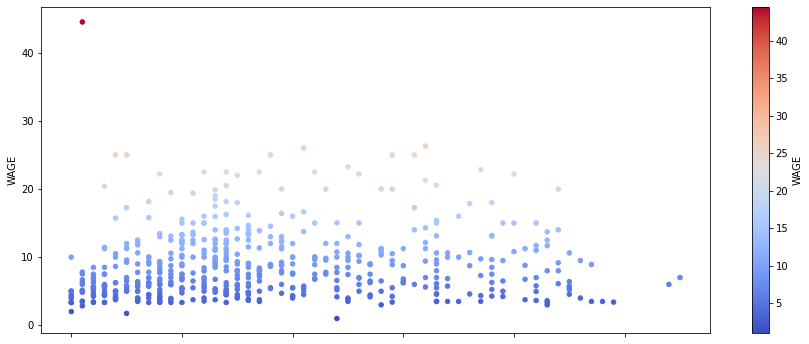

In [8]:
df[['EXPERIENCE', 'WAGE']].plot(figsize= (15,6), kind = 'scatter',x='EXPERIENCE' ,y='WAGE',c='WAGE', cmap='coolwarm' )

<AxesSubplot: xlabel='AGE', ylabel='EXPERIENCE'>

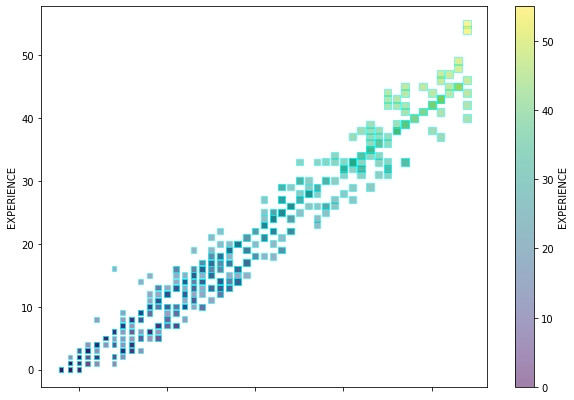

In [9]:
df.plot(kind='scatter',x='AGE',y='EXPERIENCE', alpha=0.5,c='EXPERIENCE', cmap='viridis',figsize=(10,7), marker='s' , s='AGE', edgecolor='cyan')

In [10]:
df

,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
EDUCATION,,,,,,,,,,
8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
12,no,male,17,not_member,7.50,35,White,Other,Other,Married
...,...,...,...,...,...,...,...,...,...,...
18,no,male,5,not_member,11.36,29,White,Professional,Other,Unmarried
12,no,female,33,not_member,6.10,51,Other,Professional,Other,Married
17,no,female,25,member,23.25,48,Other,Professional,Other,Married


In [13]:
df[['SOUTH','AGE']]

,SOUTH,AGE
EDUCATION,,
8,no,35
9,no,57
12,no,19
12,no,22
12,no,35
...,...,...
18,no,29
12,no,51
17,no,48


In [14]:
df

,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
EDUCATION,,,,,,,,,,
8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
12,no,male,17,not_member,7.50,35,White,Other,Other,Married
...,...,...,...,...,...,...,...,...,...,...
18,no,male,5,not_member,11.36,29,White,Professional,Other,Unmarried
12,no,female,33,not_member,6.10,51,Other,Professional,Other,Married
17,no,female,25,member,23.25,48,Other,Professional,Other,Married


PIVOT TABLE

In [17]:
df.pivot_table(values='AGE', index='SECTOR', aggfunc=['mean','max','min','median'])

,mean,max,min,median
,AGE,AGE,AGE,AGE
SECTOR,,,,
Construction,40.083333,61,20,42.5
Manufacturing,37.838384,64,19,35.0
Other,36.401460,64,18,35.0


In [18]:
df.pivot_table(values='AGE',index='SECTOR',columns='SEX')

SEX,female,male
SECTOR,,
Construction,57.500000,38.500000
Manufacturing,38.666667,37.300000
Other,37.490196,35.328502


<AxesSubplot: xlabel='SECTOR'>

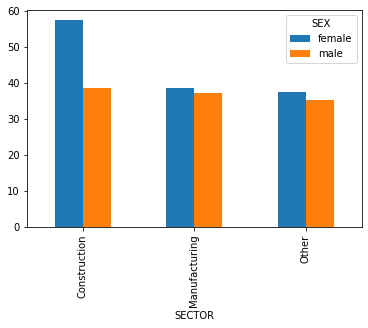

In [20]:
df.pivot_table(values='AGE',index='SECTOR',columns='SEX').plot(kind='bar')

In [22]:
df.pivot_table(values='WAGE',index='SECTOR',columns='SEX')

SEX,female,male
SECTOR,,
Construction,8.130000,9.320000
Manufacturing,7.686410,10.851167
Other,7.913186,9.818454


<AxesSubplot: xlabel='SECTOR'>

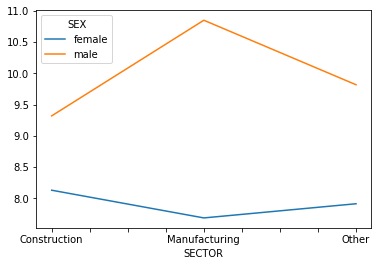

In [25]:
df.pivot_table(values='WAGE',index='SECTOR',columns='SEX').plot()

# FILTERING DATA USING BOOLEAN FILTER

In [26]:
df['SECTOR']=='Manufcturing' # THIS IS BOOLEAN FILTER 

EDUCATION
8     False
9     False
12    False
12    False
12    False
      ...  
18    False
12    False
17    False
12    False
16    False
Name: SECTOR, Length: 534, dtype: bool

In [27]:
df[df['SECTOR']=='Manufcturing'] # BOOLEAN FILTERING

,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
EDUCATION,,,,,,,,,,


In [28]:
df[~(df['SECTOR']=='Manufcturing')]  # INVERTED BOOLEAN FILTERING 

,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
EDUCATION,,,,,,,,,,
8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
12,no,male,17,not_member,7.50,35,White,Other,Other,Married
...,...,...,...,...,...,...,...,...,...,...
18,no,male,5,not_member,11.36,29,White,Professional,Other,Unmarried
12,no,female,33,not_member,6.10,51,Other,Professional,Other,Married
17,no,female,25,member,23.25,48,Other,Professional,Other,Married


In [30]:
explt10=df['EXPERIENCE']<= 10  # BOOLEAN FILTER 
df[explt10]

,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
EDUCATION,,,,,,,,,,
12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
13,no,male,9,member,13.07,28,White,Other,Other,Unmarried
12,no,male,9,not_member,19.47,27,White,Other,Other,Unmarried
12,no,male,9,not_member,8.75,27,White,Other,Other,Unmarried
...,...,...,...,...,...,...,...,...,...,...
16,no,male,10,member,7.50,32,White,Professional,Other,Married
17,yes,male,2,not_member,7.00,25,White,Professional,Other,Married
15,no,male,10,not_member,12.50,31,White,Professional,Other,Unmarried


<AxesSubplot: >

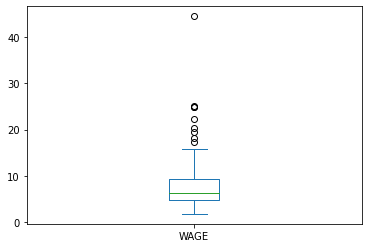

In [34]:
df[explt10].WAGE.plot(kind='box',x='EXPERIENCE',y='WAGE')

SORTING

In [35]:
df.sort_values(by='AGE',inplace=True)

In [37]:
df.sort_values(by=['RACE','WAGE'], ascending =[False,True], inplace= True)


## GROUP BY

In [39]:
df.groupby('OCCUPATION')['EXPERIENCE'].mean()

OCCUPATION
Clerical        17.577320
Management      18.072727
Other           18.064103
Professional    15.457143
Sales           18.447368
Service         20.192771
Name: EXPERIENCE, dtype: float64

In [40]:
df.groupby('OCCUPATION')['EXPERIENCE'].agg(['mean','min','max','median','std'])

,mean,min,max,median,std
OCCUPATION,,,,,
Clerical,17.577320,0,45,15.0,12.124214
Management,18.072727,1,42,15.0,11.375501
Other,18.064103,0,55,15.0,12.448438
Professional,15.457143,0,42,13.0,10.275090
Sales,18.447368,0,45,15.5,13.492135
Service,20.192771,0,54,17.0,14.718876


C:\Users\dell\AppData\Local\Temp\ipykernel_19212\2347050217.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('OCCUPATION')['EXPERIENCE','WAGE'].mean().plot(kind='box')


<AxesSubplot: >

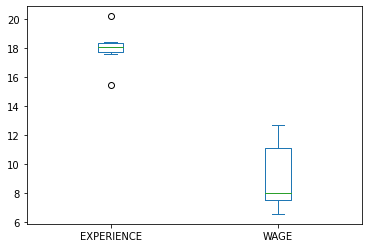

In [41]:
df.groupby('OCCUPATION')['EXPERIENCE','WAGE'].mean().plot(kind='box')